In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_da = df[df['job_title_short'] == 'Data Analyst'].copy()

c:\Users\Usuario\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


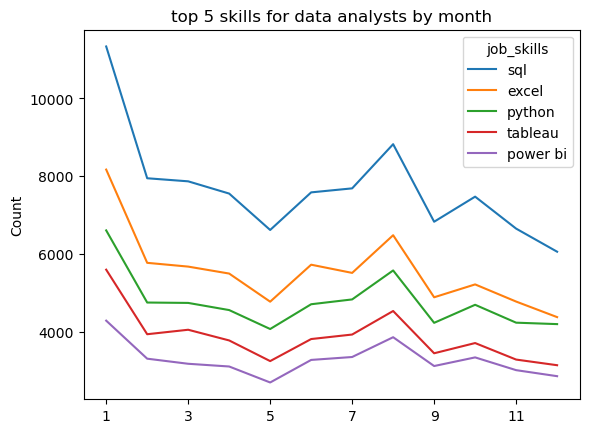

In [3]:
df_da['month'] = df_da['job_posted_date'].dt.month
df_short = df_da.explode('job_skills')
df_short_pivot = df_short.pivot_table(index='month', columns='job_skills', aggfunc='size', fill_value=0)
df_short_pivot.loc['Total'] = df_short_pivot.sum()
df_short_pivot = df_short_pivot[df_short_pivot.loc['Total'].sort_values(ascending=False).index]
df_short_pivot = df_short_pivot.drop('Total')
df_short_pivot.iloc[:, :5].plot(kind='line')
plt.title('top 5 skills for data analysts by month')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

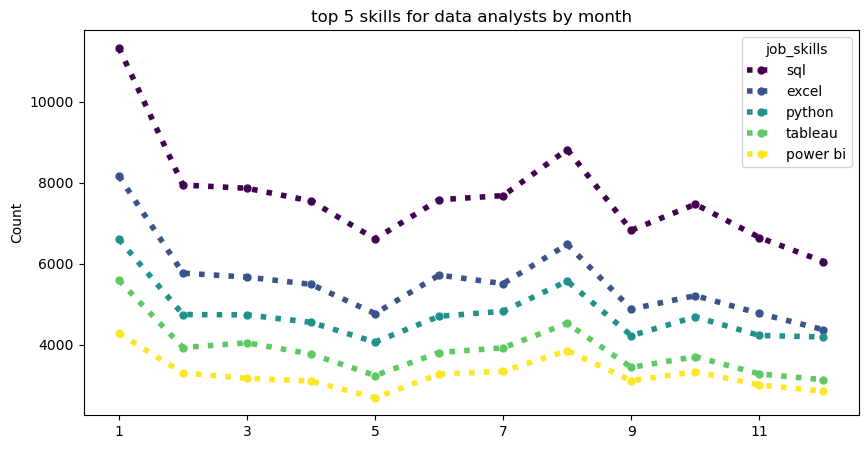

In [4]:
df_short_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', # options: '-' '--' '-.' ':'
    colormap='viridis',
    marker='o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    markersize=5,
    figsize=(10, 5)

)
plt.title('top 5 skills for data analysts by month')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [5]:
# Explode the 'job_skills' into individual rows
df_exploded = df_da.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

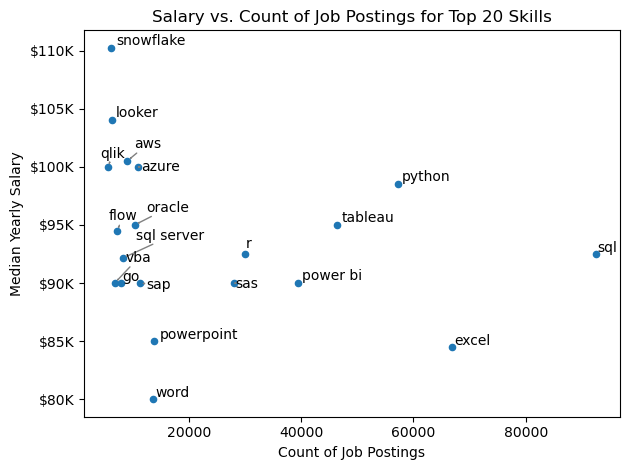

In [11]:
from adjustText import adjust_text

skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
texts=[]
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()